In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import shutil

def remove_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' and its contents successfully removed.")
    except Exception as e:
        print(f"An error occurred while removing the folder: {e}")



In [3]:
# remove folders
folder_to_remove = "sample-notebooks"
remove_folder(folder_to_remove)

An error occurred while removing the folder: [Errno 2] No such file or directory: 'sample-notebooks'


In [4]:
#-------------------------------------------------------------------------------------------------------

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
######################################################################################### seeing admissions.csv file

In [7]:
df0 = pd.read_csv('./mimic-iv-2.2/hosp/admissions.csv.gz')
                  

In [8]:
df0.isnull().sum()

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               422633
admission_type               0
admit_provider_id            4
admission_location           0
discharge_location      119155
insurance                    0
language                     0
marital_status            9233
race                         0
edregtime               131949
edouttime               131949
hospital_expire_flag         0
dtype: int64

In [9]:
df0.loc[:,'deathtime'].value_counts()

2131-01-20 05:15:00    1
2183-04-12 07:55:00    1
2145-03-30 16:37:00    1
2137-09-06 21:33:00    1
2188-07-02 22:10:00    1
                      ..
2173-06-11 18:00:00    1
2123-03-27 10:00:00    1
2123-01-17 16:23:00    1
2110-12-15 19:59:00    1
2164-09-17 13:42:00    1
Name: deathtime, Length: 8598, dtype: int64

In [10]:
df0.describe()

,subject_id,hadm_id,hospital_expire_flag
count,4.312310e+05,4.312310e+05,431231.000000
mean,1.500766e+07,2.500314e+07,0.019964
std,2.877498e+06,2.888180e+06,0.139876
min,1.000003e+07,2.000002e+07,0.000000
25%,1.251557e+07,2.250155e+07,0.000000
50%,1.501288e+07,2.500669e+07,0.000000
75%,1.749622e+07,2.750470e+07,0.000000
max,1.999999e+07,2.999993e+07,1.000000


In [11]:
#Convert ADMITTIME and DISCHTIME columns to datetime
df0['admittime'] = pd.to_datetime(df0['admittime'])
df0['dischtime'] = pd.to_datetime(df0['dischtime'])

#Filter rows with time difference within 30 days
within_30_days = df0[df0.apply(lambda row: (row['dischtime'] - row['admittime']).days <= 30, axis=1)]
within_30_days

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431226,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,NaN,EW EMER.,P75BG6,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2149-01-08 09:11:00,2149-01-08 18:12:00,0
431227,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,NaN,EW EMER.,P16C7J,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,2147-07-17 17:18:00,2147-07-18 17:34:00,0
431228,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,2164-09-17 13:42:00,EW EMER.,P58A9J,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,2164-09-10 11:09:00,2164-09-10 14:46:00,1
431229,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,NaN,EW EMER.,P506DE,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,2164-07-24 21:16:00,2164-07-25 01:20:00,0


In [12]:
within_30_days.head(0)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag


In [13]:
within_30_days.nunique()

subject_id              179929
hadm_id                 426899
admittime               420330
dischtime               416557
deathtime                 8126
admission_type               9
admit_provider_id         1722
admission_location          11
discharge_location          13
insurance                    3
language                     2
marital_status               4
race                        33
edregtime               291618
edouttime               291667
hospital_expire_flag         2
dtype: int64

In [14]:
within_30_days.isna().sum()   #contagem dos NaN

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               418773
admission_type               0
admit_provider_id            4
admission_location           0
discharge_location      119144
insurance                    0
language                     0
marital_status            8992
race                         0
edregtime               130172
edouttime               130172
hospital_expire_flag         0
dtype: int64

In [15]:
#drop columns
columns_to_drop = ['language','edregtime','edouttime']
droped_30days_df = within_30_days.drop(columns=columns_to_drop)
droped_30days_df.isna().sum()

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               418773
admission_type               0
admit_provider_id            4
admission_location           0
discharge_location      119144
insurance                    0
marital_status            8992
race                         0
hospital_expire_flag         0
dtype: int64

In [16]:
# Create a new binary column based of DEATHTIME; 1 - death; 0 - no death.
droped_30days_df['BINARY_DEATH'] = droped_30days_df['deathtime'].replace('NaN', int(0))
droped_30days_df['BINARY_DEATH'] = droped_30days_df['deathtime'].notna().astype(int)

In [17]:
droped_30days_df['BINARY_DEATH'].value_counts()

0    418773
1      8126
Name: BINARY_DEATH, dtype: int64

In [18]:
#drop columns DEATHTIME
columns_to_drop = ['deathtime']
droped_30days_df0 = droped_30days_df.drop(columns=columns_to_drop)
droped_30days_df0.isna().sum()

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
admission_type               0
admit_provider_id            4
admission_location           0
discharge_location      119144
insurance                    0
marital_status            8992
race                         0
hospital_expire_flag         0
BINARY_DEATH                 0
dtype: int64

In [19]:
droped_30days_df0['BINARY_DEATH'].value_counts()

0    418773
1      8126
Name: BINARY_DEATH, dtype: int64

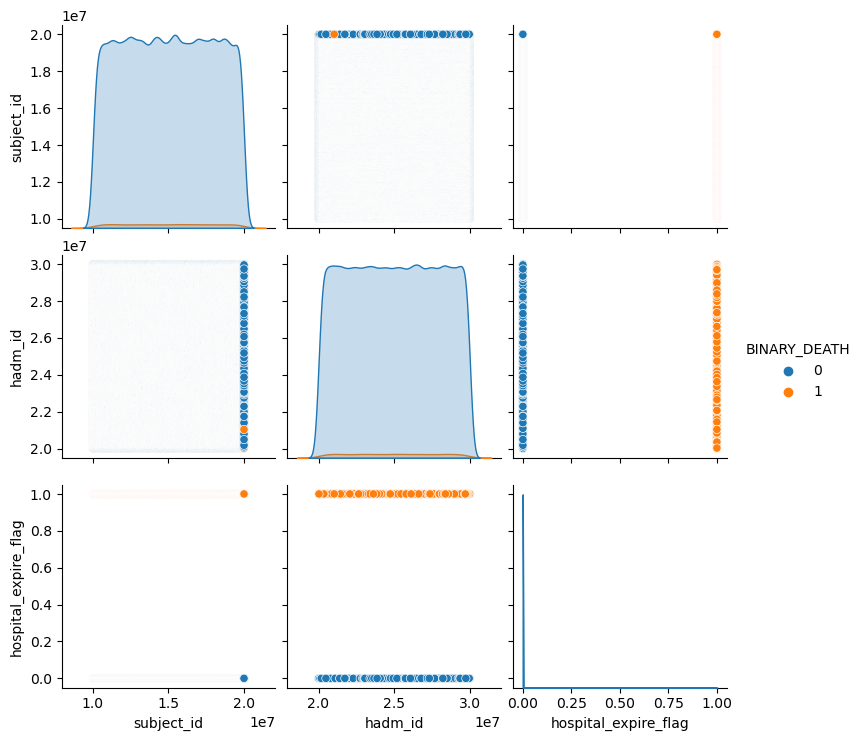

In [20]:
sns.pairplot(droped_30days_df0, hue='BINARY_DEATH')

In [21]:
droped_30days_df0

,subject_id,hadm_id,admittime,dischtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,marital_status,race,hospital_expire_flag,BINARY_DEATH
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,WHITE,0,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,WIDOWED,WHITE,0,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,WIDOWED,WHITE,0,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,WIDOWED,WHITE,0,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,SINGLE,WHITE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431226,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,EW EMER.,P75BG6,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,SINGLE,WHITE,0,0
431227,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,EW EMER.,P16C7J,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,SINGLE,WHITE,0,0
431228,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,EW EMER.,P58A9J,EMERGENCY ROOM,DIED,Other,WIDOWED,WHITE,1,1
431229,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,EW EMER.,P506DE,EMERGENCY ROOM,HOME,Other,WIDOWED,WHITE,0,0


In [22]:
most_frequent_admissionplace= droped_30days_df0['admission_location'].value_counts().index[0]
most_frequent_admissionplace

'EMERGENCY ROOM'

In [23]:
most_frequent_admissiontype= droped_30days_df0['admission_type'].value_counts().index[0]
most_frequent_admissiontype

'EW EMER.'

In [24]:
most_frequent_discharge = droped_30days_df0['discharge_location'].value_counts().index[0]
most_frequent_discharge 

'HOME'

In [25]:
######################################################################################### seeing dignoses_icd.csv file

In [26]:
df1 = pd.read_csv('./mimic-iv-2.2/hosp/diagnoses_icd.csv.gz')



In [27]:
df1_1 = pd.read_csv('./mimic-iv-2.2/hosp/d_icd_diagnoses.csv.gz')

In [28]:
most_frequent_diagnosis = df1['icd_code'].value_counts().index[0]
most_frequent_diagnosis

'4019'

In [29]:
secondmost_frequent_diagnosis = df1['icd_code'].value_counts().index[1]
secondmost_frequent_diagnosis

'2724'

In [30]:
thirdmost_frequent_diagnosis = df1['icd_code'].value_counts().index[2]
thirdmost_frequent_diagnosis

'I10'

In [31]:
fourmost_frequent_diagnosis = df1['icd_code'].value_counts().index[3]
fourmost_frequent_diagnosis

'E785'

In [32]:
######################################################################################### seeing icustays.csv file

In [33]:

df2 = pd.read_csv('./mimic-iv-2.2/icu/icustays.csv.gz')


In [34]:
most_frequent_careunit = df2['first_careunit'].value_counts().index[0]
most_frequent_careunit

'Medical Intensive Care Unit (MICU)'

In [35]:
most_frequent_endcareunit = df2['last_careunit'].value_counts().index[0]
most_frequent_endcareunit

'Medical Intensive Care Unit (MICU)'

In [36]:
frequent_patient = df2['subject_id'].value_counts()
frequent_patient

18358138    37
17585185    33
12468016    33
13269859    30
18676703    26
            ..
13794732     1
13795136     1
13795513     1
13795693     1
19999987     1
Name: subject_id, Length: 50920, dtype: int64

In [37]:
most_frequent_patient = df2['subject_id'].value_counts().index[0]
most_frequent_patient

18358138

In [38]:
frequent_patient = pd.DataFrame({'subject_id': frequent_patient.index, 'count_icu': frequent_patient.values})
csv_path = 'frequent_patient_icu.csv'
frequent_patient.to_csv(csv_path, index=False)

In [39]:
df4 = pd.read_csv('frequent_patient_icu.csv')
df4

,subject_id,count_icu
0,18358138,37
1,17585185,33
2,12468016,33
3,13269859,30
4,18676703,26
...,...,...
50915,13794732,1
50916,13795136,1
50917,13795513,1
50918,13795693,1


In [40]:
#----------------------------------------------------------------------------------

In [41]:
# JUNTAR DATASETS - criar dataset new30df

In [42]:
df3 = pd.read_csv('./mimic-iv-2.2/hosp/patients.csv.gz')
df3

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299707,19999828,F,46,2147,2017 - 2019,NaN
299708,19999829,F,28,2186,2008 - 2010,NaN
299709,19999840,M,58,2164,2008 - 2010,2164-09-17
299710,19999914,F,49,2158,2017 - 2019,NaN


In [43]:
#drop columns DEATHTIME
columns_to_drop = ['hadm_id','admittime','dischtime','admit_provider_id','admission_location','insurance','hospital_expire_flag']
new30df = droped_30days_df0.drop(columns=columns_to_drop)

In [44]:
frequent_patient_adm = droped_30days_df0['subject_id'].value_counts()
frequent_patient_adm

15496609    238
15464144    185
10714009    163
16662316    142
15229574    130
           ... 
14292225      1
14292221      1
14292216      1
14292138      1
19999987      1
Name: subject_id, Length: 179929, dtype: int64

In [45]:
frequent_patient_adm = pd.DataFrame({'subject_id': frequent_patient_adm.index, 'count_adm': frequent_patient_adm.values})
csv_path = 'frequent_patient_adm.csv'
frequent_patient_adm.to_csv(csv_path, index=False)

In [46]:
df5 = pd.read_csv('frequent_patient_adm.csv')
df5

,subject_id,count_adm
0,15496609,238
1,15464144,185
2,10714009,163
3,16662316,142
4,15229574,130
...,...,...
179924,14292225,1
179925,14292221,1
179926,14292216,1
179927,14292138,1


In [47]:
new30df1 = new30df.merge(df3[['subject_id','gender','anchor_age']], on='subject_id', how='left')
new30df1

,subject_id,admission_type,discharge_location,marital_status,race,BINARY_DEATH,gender,anchor_age
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,F,52
1,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52
2,10000032,EW EMER.,HOSPICE,WIDOWED,WHITE,0,F,52
3,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52
4,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,F,19
...,...,...,...,...,...,...,...,...
426894,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46
426895,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46
426896,19999840,EW EMER.,DIED,WIDOWED,WHITE,1,M,58
426897,19999840,EW EMER.,HOME,WIDOWED,WHITE,0,M,58


In [48]:
new30df2 = new30df1.merge(df4[['subject_id','count_icu']], on='subject_id', how='left')
new30df2['count_icu'].fillna(0, inplace=True)
new30df2

,subject_id,admission_type,discharge_location,marital_status,race,BINARY_DEATH,gender,anchor_age,count_icu
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,F,52,1.0
1,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52,1.0
2,10000032,EW EMER.,HOSPICE,WIDOWED,WHITE,0,F,52,1.0
3,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52,1.0
4,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,F,19,0.0
...,...,...,...,...,...,...,...,...,...
426894,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46,1.0
426895,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46,1.0
426896,19999840,EW EMER.,DIED,WIDOWED,WHITE,1,M,58,1.0
426897,19999840,EW EMER.,HOME,WIDOWED,WHITE,0,M,58,1.0


In [68]:
new30df3 = new30df2.merge(df5[['subject_id','count_adm']], on='subject_id', how='left')
new30df3['count_adm'].fillna(0, inplace=True)
new30df3

,subject_id,admission_type,discharge_location,marital_status,race,BINARY_DEATH,gender,anchor_age,count_icu,count_adm
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,F,52,1.0,4
1,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52,1.0,4
2,10000032,EW EMER.,HOSPICE,WIDOWED,WHITE,0,F,52,1.0,4
3,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52,1.0,4
4,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,F,19,0.0,1
...,...,...,...,...,...,...,...,...,...,...
426894,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46,1.0,2
426895,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46,1.0,2
426896,19999840,EW EMER.,DIED,WIDOWED,WHITE,1,M,58,1.0,2
426897,19999840,EW EMER.,HOME,WIDOWED,WHITE,0,M,58,1.0,2


In [69]:
new30df3['subject_id'].value_counts().index[0]

15496609

In [50]:
df1_1
#df1


,icd_code,icd_version,long_title
0,0010,9,Cholera due to vibrio cholerae
1,0011,9,Cholera due to vibrio cholerae el tor
2,0019,9,"Cholera, unspecified"
3,0020,9,Typhoid fever
4,0021,9,Paratyphoid fever A
...,...,...,...
109770,Z992,10,Dependence on renal dialysis
109771,Z993,10,Dependence on wheelchair
109772,Z998,10,Dependence on other enabling machines and devices
109773,Z9981,10,Dependence on supplemental oxygen


In [51]:
df11 = df1.merge(df1_1[['icd_code','long_title']], on='icd_code', how='left')
#df11

dfConjun = pd.merge(df1,df1_1, on='icd_code', how='right')
dfConjun


,subject_id,hadm_id,seq_num,icd_code,icd_version_x,icd_version_y,long_title
0,NaN,NaN,NaN,0010,NaN,9,Cholera due to vibrio cholerae
1,NaN,NaN,NaN,0011,NaN,9,Cholera due to vibrio cholerae el tor
2,NaN,NaN,NaN,0019,NaN,9,"Cholera, unspecified"
3,10158684.0,22072764.0,1.0,0020,9.0,9,Typhoid fever
4,10427677.0,23641430.0,1.0,0020,9.0,9,Typhoid fever
...,...,...,...,...,...,...,...
4943969,13885966.0,24170044.0,16.0,Z9989,10.0,10,Dependence on other enabling machines and devices
4943970,15649186.0,24755386.0,8.0,Z9989,10.0,10,Dependence on other enabling machines and devices
4943971,15897100.0,25337810.0,10.0,Z9989,10.0,10,Dependence on other enabling machines and devices
4943972,17547970.0,22221609.0,3.0,Z9989,10.0,10,Dependence on other enabling machines and devices


In [70]:
dfSubID = pd.read_csv('./mimic-iv-2.2/hosp/diagnoses_icd.csv.gz')

dfIcd = pd.read_csv('./mimic-iv-2.2/hosp/d_icd_diagnoses.csv.gz')




In [71]:
mergedDf = pd.merge(dfSubID, dfIcd, on='icd_code', how='inner')
mergedDf


#Since the icd_version_y is from the dataset that contains all the codes even the ones not attribuate to any patient 
#We can just drop the column 'icd_version_y'

mergedDf = mergedDf.drop(columns=['icd_version_y'])


mergedDf = mergedDf.rename(columns={'icd_version_x': 'icd_version'})

mergedDf


,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10000032,22595853,1,5723,9,Portal hypertension
1,10000826,20032235,4,5723,9,Portal hypertension
2,10000826,28289260,1,5723,9,Portal hypertension
3,10005866,26158160,4,5723,9,Portal hypertension
4,10008924,23676183,7,5723,9,Portal hypertension
...,...,...,...,...,...,...
4860275,19990427,29695607,24,T24011A,10,"Burn of unspecified degree of right thigh, ini..."
4860276,19996016,28015466,4,O30093,10,"Twin pregnancy, unable to determine number of ..."
4860277,19996783,25894657,20,H353131,10,"Nonexudative age-related macular degeneration,..."
4860278,19997062,20096107,1,K8036,10,Calculus of bile duct with acute and chronic c...


In [54]:
new30df3

,subject_id,admission_type,discharge_location,marital_status,race,BINARY_DEATH,gender,anchor_age,count_icu,count_adm
0,10000032,URGENT,HOME,WIDOWED,WHITE,0,F,52,1.0,4
1,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52,1.0,4
2,10000032,EW EMER.,HOSPICE,WIDOWED,WHITE,0,F,52,1.0,4
3,10000032,EW EMER.,HOME,WIDOWED,WHITE,0,F,52,1.0,4
4,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0,F,19,0.0,1
...,...,...,...,...,...,...,...,...,...,...
426894,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46,1.0,2
426895,19999828,EW EMER.,HOME HEALTH CARE,SINGLE,WHITE,0,F,46,1.0,2
426896,19999840,EW EMER.,DIED,WIDOWED,WHITE,1,M,58,1.0,2
426897,19999840,EW EMER.,HOME,WIDOWED,WHITE,0,M,58,1.0,2


In [72]:

new30df3 = pd.concat([new30df3, mergedDf], axis=0)

#new30df3 = new30df3.merge(df1_1['long_title'], on='icd_code', how='left')





In [73]:
new30df3['subject_id'].value_counts().index[0]

12468016

In [113]:
new30df3

,subject_id,admission_type,discharge_location,marital_status,race,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,hadm_id,seq_num,icd_code,icd_version,long_title
0,10000032,URGENT,HOME,WIDOWED,WHITE,0.0,F,52.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
1,10000032,EW EMER.,HOME,WIDOWED,WHITE,0.0,F,52.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
2,10000032,EW EMER.,HOSPICE,WIDOWED,WHITE,0.0,F,52.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
3,10000032,EW EMER.,HOME,WIDOWED,WHITE,0.0,F,52.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
4,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0.0,F,19.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860275,19990427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29695607.0,24.0,T24011A,10.0,"Burn of unspecified degree of right thigh, ini..."
4860276,19996016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28015466.0,4.0,O30093,10.0,"Twin pregnancy, unable to determine number of ..."
4860277,19996783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25894657.0,20.0,H353131,10.0,"Nonexudative age-related macular degeneration,..."
4860278,19997062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20096107.0,1.0,K8036,10.0,Calculus of bile duct with acute and chronic c...


In [112]:
#---------------------------------------------------------------------------------- Plots

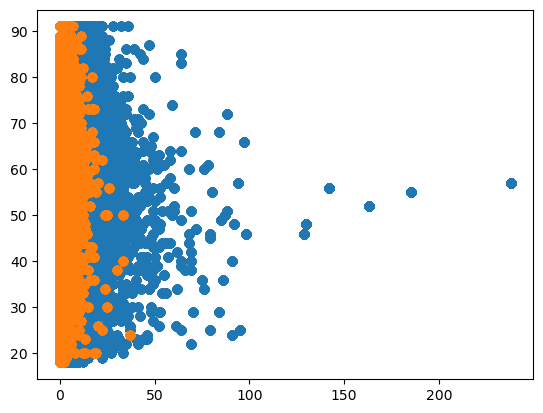

In [114]:
import matplotlib.pyplot as plt
Age = new30df3['anchor_age']
count_adm = new30df3['count_adm']
count_icu = new30df3['count_icu']
plt.scatter(count_adm, Age)
plt.scatter(count_icu, Age)
plt.show()

(array([29571., 30505., 30294., 41725., 51663., 57336., 64505., 46497.,
        39273., 35530.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <BarContainer object of 10 artists>)

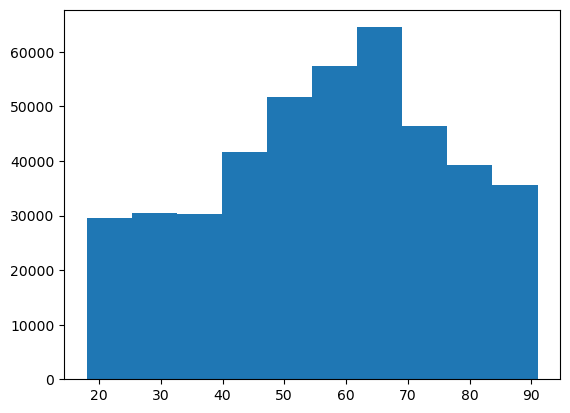

In [115]:
plt.hist(Age)

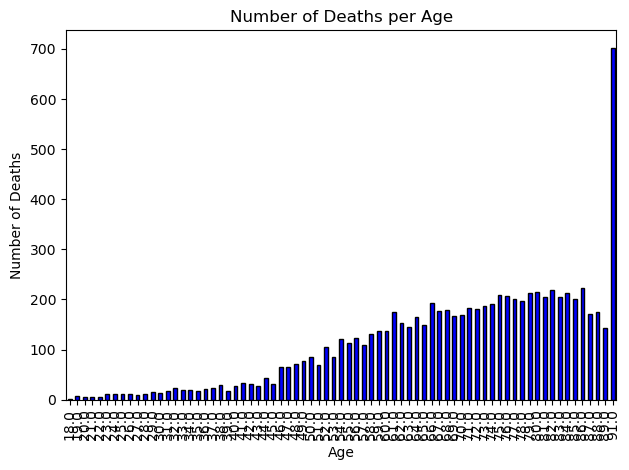

In [116]:
age_groups = new30df3.groupby('anchor_age')['BINARY_DEATH'].sum()

age_groups.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Deaths per Age')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.tight_layout()  # Adjust spacing
plt.show()  

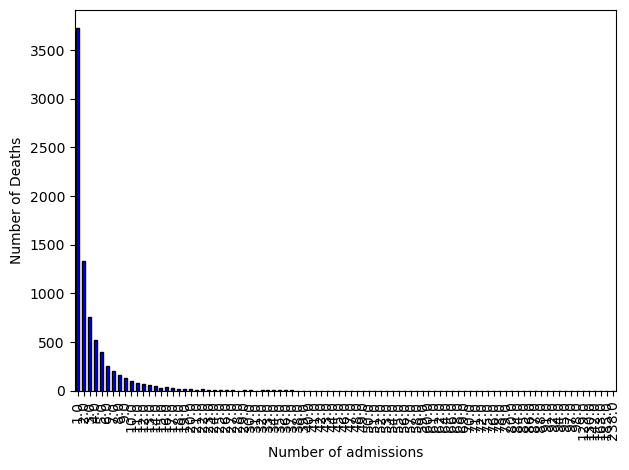

In [117]:
countsadm_groups = new30df3.groupby('count_adm')['BINARY_DEATH'].sum()

countsadm_groups.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Number of admissions')
plt.ylabel('Number of Deaths')
plt.tight_layout()  # Adjust spacing
plt.show()  

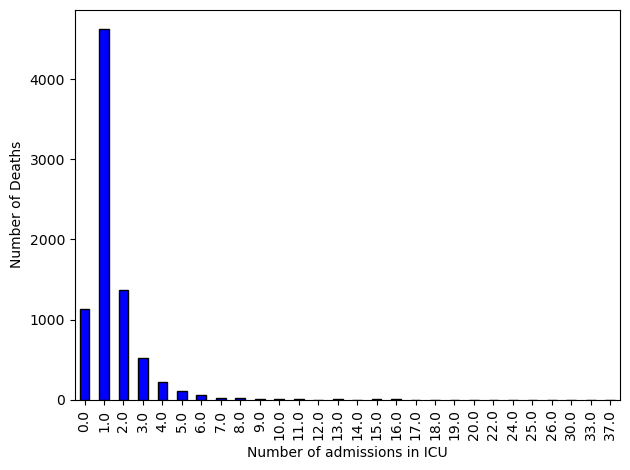

In [118]:
countsicu_groups = new30df3.groupby('count_icu')['BINARY_DEATH'].sum()

countsicu_groups.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Number of admissions in ICU')
plt.ylabel('Number of Deaths')
plt.tight_layout()  # Adjust spacing
plt.show()  #Quem vai para ICU, quase que não escapa lol   . 0 era Nan values. 

In [119]:
#################################################################################################

In [67]:
new30df3['subject_id'].value_counts()

12468016    2195
18284271    1764
13475033    1730
18902344    1695
10577647    1568
            ... 
15883387       1
15394964       1
16252021       1
17109833       1
13480484       1
Name: subject_id, Length: 180733, dtype: int64

In [61]:
new30df3

,subject_id,admission_type,discharge_location,marital_status,race,BINARY_DEATH,gender,anchor_age,count_icu,count_adm,hadm_id,seq_num,icd_code,icd_version,long_title
0,10000032,URGENT,HOME,WIDOWED,WHITE,0.0,F,52.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
1,10000032,EW EMER.,HOME,WIDOWED,WHITE,0.0,F,52.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
2,10000032,EW EMER.,HOSPICE,WIDOWED,WHITE,0.0,F,52.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
3,10000032,EW EMER.,HOME,WIDOWED,WHITE,0.0,F,52.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN
4,10000068,EU OBSERVATION,NaN,SINGLE,WHITE,0.0,F,19.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860275,19990427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29695607.0,24.0,T24011A,10.0,"Burn of unspecified degree of right thigh, ini..."
4860276,19996016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28015466.0,4.0,O30093,10.0,"Twin pregnancy, unable to determine number of ..."
4860277,19996783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25894657.0,20.0,H353131,10.0,"Nonexudative age-related macular degeneration,..."
4860278,19997062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20096107.0,1.0,K8036,10.0,Calculus of bile duct with acute and chronic c...
